In [4]:
import torch
import torch.nn as nn
from torch import optim

import numpy as np
import pandas as pd

from utils import FaceKeypointDataset, transform, train_test_split, train
from model.network import Net

In [5]:
annotations_df = pd.read_csv("./data/AFLW/annotations.csv")#'data/Annotations/annotations.csv')
images_dir = './data/flickr/'#'data/Images/'

In [6]:
dataset = FaceKeypointDataset(annotations=annotations_df, 
                              root_dir=images_dir, 
                              transform=transform)

In [7]:
train_loader, val_loader, test_loader = train_test_split(dataset, 
                                                         train_size=0.8, 
                                                         val_size=0.1, 
                                                         batch_size=128)

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net().to(device)


In [9]:
criterion_keypoints = nn.MSELoss().to(device)
criterion_bbox = nn.SmoothL1Loss().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [10]:
model.to('cuda')

Net(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(256, 512, kernel_size=(1, 1), stride=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn5): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=512, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc_keypoints): Linear(in

In [11]:
train(model, 
      criterion_keypoints, 
      criterion_bbox, 
      optimizer, 
      train_loader, 
      val_loader, 
      epochs=50, 
      device='cuda', 
      bbox_weight=1.0)

KeyboardInterrupt: 

# O1 Optimized + Model from Phi4

In [ ]:
import os
import torch
import torch.nn as nn
from torch import optim
import pandas as pd

from utils import FaceKeypointDataset, transform, train_test_split, train
from model.network import Net, FacialLandmarkAndBBoxModel

##########################################################
# 1. Load Annotations and Image Paths
##########################################################
annotations_df = pd.read_csv("./data/AFLW/annotations.csv")
images_dir = "./data/flickr/"

##########################################################
# 2. Create Dataset
##########################################################
dataset = FaceKeypointDataset(
    annotations=annotations_df,
    root_dir=images_dir,
    transform=transform
)

##########################################################
# 3. Split Dataset into Train/Val/Test
##########################################################
train_loader, val_loader, test_loader = train_test_split(
    dataset,
    train_size=0.8,
    val_size=0.1,
    batch_size=96
)

##########################################################
# 4. Set Device
##########################################################
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

##########################################################
# 5. Initialize Model
##########################################################
model = FacialLandmarkAndBBoxModel().to(device)

##########################################################
# 6. Define Loss Functions and Optimizer
##########################################################
criterion_keypoints = nn.MSELoss().to(device)
criterion_bbox = nn.SmoothL1Loss().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

##########################################################
# 7. Train the Model
##########################################################
train(
    model,
    criterion_keypoints,
    criterion_bbox,
    optimizer,
    train_loader,
    val_loader,
    epochs=50,
    device=device,
    bbox_weight=1.0
)


Epoch 1/50 | Train Loss: 21.0357 | Val Loss: 0.0352
Best model saved at epoch 1 with Val Loss: 0.0352


Epoch 2/50 | Train Loss: 0.0331 | Val Loss: 0.0288
Best model saved at epoch 2 with Val Loss: 0.0288


Epoch 3/50 | Train Loss: 0.0283 | Val Loss: 0.0255
Best model saved at epoch 3 with Val Loss: 0.0255


Epoch 4/50 | Train Loss: 0.0251 | Val Loss: 0.0237
Best model saved at epoch 4 with Val Loss: 0.0237


Epoch 5/50 | Train Loss: 0.0233 | Val Loss: 0.0221
Best model saved at epoch 5 with Val Loss: 0.0221


Epoch 6/50 | Train Loss: 0.0212 | Val Loss: 0.0218
Best model saved at epoch 6 with Val Loss: 0.0218


Epoch 7/50 | Train Loss: 0.0194 | Val Loss: 0.0209
Best model saved at epoch 7 with Val Loss: 0.0209


Epoch 8/50 | Train Loss: 0.0180 | Val Loss: 0.0201
Best model saved at epoch 8 with Val Loss: 0.0201


Epoch 9/50 | Train Loss: 0.0170 | Val Loss: 0.0204


Epoch 10/50 | Train Loss: 0.0156 | Val Loss: 0.0203


Epoch 11/50 | Train Loss: 0.0146 | Val Loss: 0.0212


Epoch 12/50 | Train Loss: 0.0137 | Val Loss: 0.0237


Epoch 13/50 | Train Loss: 0.0129 | Val Loss: 0.0210


Epoch 14/50 | Train Loss: 0.0121 | Val Loss: 0.0221


Epoch 15/50 | Train Loss: 0.0114 | Val Loss: 0.0220


Epoch 16/50 | Train Loss: 0.0110 | Val Loss: 0.0220


Epoch 17/50 | Train Loss: 0.0105 | Val Loss: 0.0220


Epoch 18/50 | Train Loss: 0.0101 | Val Loss: 0.0224


Epoch 19/50 | Train Loss: 0.0099 | Val Loss: 0.0229


Epoch 20/50 | Train Loss: 0.0096 | Val Loss: 0.0226


Epoch 21/50 | Train Loss: 0.0093 | Val Loss: 0.0235


Epoch 22/50 | Train Loss: 0.0091 | Val Loss: 0.0227


Epoch 23/50 | Train Loss: 0.0089 | Val Loss: 0.0232


Epoch 24/50 | Train Loss: 0.0089 | Val Loss: 0.0234


Epoch 25/50 | Train Loss: 0.0088 | Val Loss: 0.0227


Epoch 26/50 | Train Loss: 0.0085 | Val Loss: 0.0228


Epoch 27/50 | Train Loss: 0.0084 | Val Loss: 0.0229


Epoch 28/50 | Train Loss: 0.0082 | Val Loss: 0.0234


Epoch 29/50 | Train Loss: 0.0082 | Val Loss: 0.0221


Epoch 30/50 | Train Loss: 0.0082 | Val Loss: 0.0230


Epoch 31/50 | Train Loss: 0.0080 | Val Loss: 0.0230


Epoch 32/50 | Train Loss: 0.0081 | Val Loss: 0.0227


Epoch 33/50 | Train Loss: 0.0079 | Val Loss: 0.0237


Epoch 34/50 | Train Loss: 0.0080 | Val Loss: 0.0233


Epoch 35/50 | Train Loss: 0.0080 | Val Loss: 0.0235


Epoch 36/50 | Train Loss: 0.0078 | Val Loss: 0.0226


Epoch 37/50 | Train Loss: 0.0079 | Val Loss: 0.0228


Epoch 38/50 | Train Loss: 0.0077 | Val Loss: 0.0239


Epoch 39/50 | Train Loss: 0.0078 | Val Loss: 0.0228


Epoch 40/50 | Train Loss: 0.0077 | Val Loss: 0.0229


Epoch 41/50 | Train Loss: 0.0076 | Val Loss: 0.0225


Epoch 42/50 | Train Loss: 0.0075 | Val Loss: 0.0229


Epoch 43/50 | Train Loss: 0.0077 | Val Loss: 0.0233


Epoch 44/50 | Train Loss: 0.0075 | Val Loss: 0.0229


Epoch 45/50 | Train Loss: 0.0074 | Val Loss: 0.0230


Epoch 46/50 | Train Loss: 0.0075 | Val Loss: 0.0231


Epoch 47/50 | Train Loss: 0.0073 | Val Loss: 0.0227


Epoch 48/50 | Train Loss: 0.0074 | Val Loss: 0.0234


Epoch 49/50 | Train Loss: 0.0074 | Val Loss: 0.0229


Epoch 50/50 | Train Loss: 0.0075 | Val Loss: 0.0228


: 

## Evaluation test

C:\Users\Mikae\AppData\Local\Temp\ipykernel_6420\3681919282.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_dict)["model_state_di

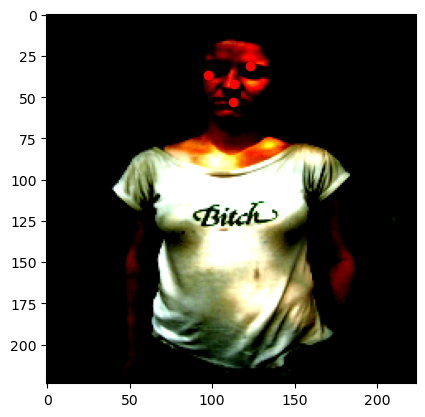

: 

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
 
# Get an example from the test data
example_data = test_loader.dataset[484]

example_image = example_data[0].unsqueeze(0).to(device)
example_keypoints = example_data[1].to(device)
example_bbox = example_data[2].to(device)

model = FacialLandmarkAndBBoxModel().to(device)
model_dict ="./model/models/best_model.pth"

model.load_state_dict(torch.load(model_dict)["model_state_dict"])

# Set the model to evaluation mode
model.eval()
 
# Get the model predictions
with torch.no_grad():
    pred_keypoints, pred_bbox = model(example_image)
 
# Convert predictions to numpy for plotting
pred_keypoints_np = pred_keypoints.cpu().numpy().reshape(-1, 2)
pred_bbox_np = pred_bbox.cpu().numpy().reshape(-1)

# Multiply the predicted bounding box values by the image width and height
pred_bbox_np[0] *= example_image.shape[3]
pred_bbox_np[1] *= example_image.shape[2]
pred_bbox_np[2] *= example_image.shape[3]
pred_bbox_np[3] *= example_image.shape[2]

# Multiply the predicted keypoints by the image width and height
pred_keypoints_np[:, 0] *= example_image.shape[3]
pred_keypoints_np[:, 1] *= example_image.shape[2]

# Plot the image
fig, ax = plt.subplots(1)
ax.imshow(example_image.cpu().squeeze().permute(1, 2, 0))
 
# Plot the predicted keypoints
for (x, y) in pred_keypoints_np:
    ax.plot(x, y, 'ro')
 
# Plot the predicted bounding box
# rect = patches.Rectangle((pred_bbox_np[0], pred_bbox_np[1]), pred_bbox_np[2], pred_bbox_np[3], linewidth=1, edgecolor='r', facecolor='none')
# ax.add_patch(rect)
 
plt.show()

In [22]:
example_image.shape[0]

1

: 